In [90]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import string
import re

#!pip install nltk
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
len(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

from sklearn.pipeline import Pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [143]:
train_ds = pd.read_csv("/content/sentiment_train", delimiter='\t')
train_ds

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [92]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [93]:
train_ds['sentiment'].value_counts()

,count
sentiment,
1,3943
0,2975


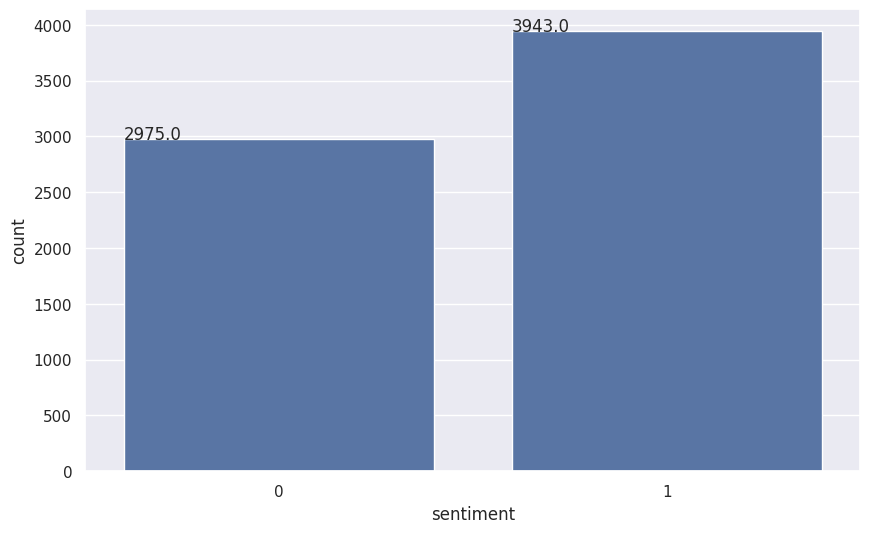

In [94]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='sentiment', data=train_ds)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x(), p.get_height()))


In [95]:
positive_review = (train_ds['sentiment'].value_counts()[0]/len(train_ds)) * 100
negative_review = 100 - positive_review
print("Postive_review %: ", positive_review)
print("Negative_review %: ", negative_review)

Postive_review %:  43.00375831165076
Negative_review %:  56.99624168834924


In [96]:
train_ds.isnull().sum()

,0
sentiment,0
text,0


# Pre-processing

In [97]:
train_ds['text'][6]

'I loved the Da Vinci Code, but now I want something better and different!..'

In [98]:
def preprocessing(text):
  sentence=[]
  text = text.lower()
  text = ''.join([i for i in text if i not in string.punctuation])
  text = re.sub('[^a-zA-Z]',' ',text)
  text = ' '.join([word for word in nltk.word_tokenize(text) if word not in set(stopwords.words('english'))])
  text = ' '.join([WordNetLemmatizer().lemmatize(word) for word in nltk.word_tokenize(text)])
  return text

In [99]:
train_ds['text'] = train_ds['text'].apply(lambda x: preprocessing(x))

In [100]:
train_ds['text']

,text
0,da vinci code book awesome
1,first clive cussler ive ever read even book li...
2,liked da vinci code lot
3,liked da vinci code lot
4,liked da vinci code ultimatly didnt seem hold
...,...
6913,brokeback mountain boring
6914,brokeback mountain really depressing
6915,sit watching mtv movie award reminded much des...
6916,ok brokeback mountain horrible movie


In [102]:
train_ds['text'][6]

'loved da vinci code want something better different'

## BOW

In [103]:
cv = CountVectorizer()
feature_vector = cv.fit(train_ds.text)
feature_vector

CountVectorizer()

In [104]:
features = feature_vector.get_feature_names_out()
print(features)
print("Total No. of features: ", len(features))

['aaron' 'able' 'abortion' ... 'yuh' 'zach' 'zen']
Total No. of features:  1955


In [105]:
train_ds_features = cv.transform(train_ds['text'])
df = pd.DataFrame(train_ds_features.toarray(), columns = features)
df

,aaron,able,abortion,abrams,absolute,absolutely,absurd,academy,acceptable,accompaniment,...,yet,yip,youand,young,younger,youre,yuck,yuh,zach,zen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df.shape

(6918, 1955)

In [107]:
train_ds[0:1]

,sentiment,text
0,1,da vinci code book awesome


In [108]:
df.iloc[0:1, 1000:1050]

,lamest,land,lapse,larry,last,lately,later,latest,latin,latter,...,lin,line,linked,listen,listens,lit,literary,literature,little,live
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
features_count = np.sum(train_ds_features.toarray(), axis=0)
print(features_count)
print(len(features_count))

[ 2  2  1 ...  1  1 80]
1955


In [110]:
dictionary = {'features': features, 'counts': features_count}
dictionary

{'features': array(['aaron', 'able', 'abortion', ..., 'yuh', 'zach', 'zen'],
       dtype=object),
 'counts': array([ 2,  2,  1, ...,  1,  1, 80])}

In [111]:
features_count_df = pd.DataFrame(dictionary)
features_count_df # We get df with BOW.

,features,counts
0,aaron,2
1,able,2
2,abortion,1
3,abrams,1
4,absolute,1
...,...,...
1950,youre,6
1951,yuck,1
1952,yuh,1
1953,zach,1


In [112]:
# BOW with top 1000 features
cv = CountVectorizer(max_features=1000)
feature_vector = cv.fit(train_ds.text)
features = feature_vector.get_feature_names_out()
train_ds_features = cv.transform(train_ds.text)
df = pd.DataFrame(train_ds_features.toarray(), columns = features)
features_count = np.sum(train_ds_features.toarray(), axis=0)
features_count_df = pd.DataFrame({'Features': features, 'Count': features_count})
features_count_df

,Features,Count
0,aaron,2
1,able,2
2,abortion,1
3,abrams,1
4,absolute,1
...,...,...
995,younger,1
996,youre,6
997,yuck,1
998,yuh,1


In [113]:
# BOW with top 1955 features, applying stopwords & n-gram(uni-gram/bow)
cv = CountVectorizer(max_features=1955, stop_words=stopwords.words('english'), ngram_range=(1,1))
feature_vector = cv.fit(train_ds.text)
features = cv.get_feature_names_out()
train_ds_features = cv.transform(train_ds.text)
df = pd.DataFrame(train_ds_features.toarray(), columns = features)
feature_count = np.sum(train_ds_features.toarray(), axis=0)
feature_count_df = pd.DataFrame({'features': features, 'count': feature_count})
feature_count_df

,features,count
0,aaron,2
1,able,2
2,abortion,1
3,abrams,1
4,absolute,1
...,...,...
1946,youre,6
1947,yuck,1
1948,yuh,1
1949,zach,1


In [114]:
feature_count_df.sort_values(by='count', ascending=False)

,features,count
1341,potter,2093
790,harry,2088
1843,vinci,2001
395,da,1998
216,brokeback,1997
...,...,...
905,indoctrinate,1
904,indicative,1
903,indepth,1
902,independent,1


In [115]:
# BOW applying stopwords & n-gram(uni & bi-gram)
cv = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
feature_vector = cv.fit(train_ds.text)
features = cv.get_feature_names_out()
train_ds_features = cv.transform(train_ds.text)
df = pd.DataFrame(train_ds_features.toarray(), columns = features)
feature_count = np.sum(train_ds_features.toarray(), axis=0)
feature_count_df = pd.DataFrame({'features': features, 'count': feature_count})
feature_count_df

,features,count
0,aaron,2
1,aaron knew,1
2,aaron mom,1
3,able,2
4,able find,1
...,...,...
6567,yuh nasy,1
6568,zach,1
6569,zach loudest,1
6570,zen,80


In [116]:
feature_count_df.sort_values(by='count', ascending=False)

,features,count
4419,potter,2093
2395,harry potter,2088
2394,harry,2088
6183,vinci,2001
1244,da,1998
...,...,...
3195,like demeantor,1
961,code novel,1
3192,like bitch,1
3191,like asking,1


In [117]:
x_train, x_test, y_train, y_test = train_test_split(train_ds_features,train_ds.sentiment, test_size=0.2, random_state=42)

In [118]:
print(x_train.shape, x_test.shape)

(5534, 6572) (1384, 6572)


## Model Building

### Naive Bayes

In [119]:
from sklearn.naive_bayes import BernoulliNB
nb_classifier = BernoulliNB()
nb_classifier.fit(x_train, y_train)

BernoulliNB()

In [120]:
y_train_pred = nb_classifier.predict(x_train)
y_test_pred = nb_classifier.predict(x_test)

In [121]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.993314058547163
Test Accuracy:  0.9783236994219653


In [122]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2395
           1       0.99      1.00      0.99      3139

    accuracy                           0.99      5534
   macro avg       0.99      0.99      0.99      5534
weighted avg       0.99      0.99      0.99      5534

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       580
           1       0.97      0.99      0.98       804

    accuracy                           0.98      1384
   macro avg       0.98      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



#### LogisticRegression

In [123]:
from sklearn.linear_model import LogisticRegression
ls = LogisticRegression()
ls.fit(x_train, y_train)

LogisticRegression()

In [124]:
y_train_pred = ls.predict(x_train)
y_test_pred = ls.predict(x_test)

In [125]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  1.0
Test Accuracy:  0.9884393063583815


#### DecisionTree

In [126]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [127]:
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)

In [128]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  1.0
Test Accuracy:  0.9776011560693642


#### RandomForest Classifier

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [130]:
y_train_pred = rf_classifier.predict(x_train)
y_test_pred = rf_classifier.predict(x_test)

In [131]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  1.0
Test Accuracy:  0.9855491329479769


In [132]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2395
           1       1.00      1.00      1.00      3139

    accuracy                           1.00      5534
   macro avg       1.00      1.00      1.00      5534
weighted avg       1.00      1.00      1.00      5534

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       580
           1       0.98      1.00      0.99       804

    accuracy                           0.99      1384
   macro avg       0.99      0.98      0.99      1384
weighted avg       0.99      0.99      0.99      1384



#### Creating Pipeline

In [133]:
train_ds.head()

,sentiment,text
0,1,da vinci code book awesome
1,1,first clive cussler ive ever read even book li...
2,1,liked da vinci code lot
3,1,liked da vinci code lot
4,1,liked da vinci code ultimatly didnt seem hold


In [144]:
x_train, x_test, y_train, y_test = train_test_split(train_ds.text, train_ds.sentiment, test_size = 0.25, random_state = 42)

In [145]:
# we are creating a pipeline, 1st we transform the data by converting text to vector and then we to apply classification model.
models = Pipeline([('BOW', CountVectorizer()), ('RF',RandomForestClassifier())])
models.fit(x_train, y_train)

Pipeline(steps=[('BOW', CountVectorizer()), ('RF', RandomForestClassifier())])

In [146]:
y_train_pred = models.predict(x_train)
y_test_pred = models.predict(x_test)

In [147]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  1.0
Test Accuracy:  0.9843930635838151


In [148]:
review = ["This movie was awesome and I love it"]
print(models.predict(review))

[1]


In [150]:
review = ["This was the worst movie i ever watched . Please don't waste your money and time."]
print(models.predict(review))

[0]
